In [1]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import geometry
import shapely
from matplotlib_scalebar.scalebar import ScaleBar
import os
import matplotlib as mpl
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

%load_ext autoreload
%autoreload 2

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/wsfish/glioblastoma/FISHspace/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)
/tmp/ipykernel_2606537/93034447.py:34: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn 

In [2]:
#adata = sc.read_h5ad('../../EEL_AnnData/EEL_41CleanNuclei-CellularNgh_FeaturesMN.h5ad')
adata = sc.read_h5ad('../../DataSubmission/GBM_Linnarsson_EEL.h5ad')
a = ['Endothelial' if x.count('Endothelial') else x for x in adata.obs['m-states']]
adata.obs['m-states'] = pd.Categorical(['Mural' if x.count('Mural') else x for x in a])
adata

AnnData object with n_obs × n_vars = 6139386 × 878
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80'
    var: 'Accession', 'Gene'
    obsm: 'spatial'

In [3]:
palette_colors = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',
    
    'Endothelial':'#d5b8ff', # '#d5b8ff',  
    'Mural': '#d5b8ff',#'#8c14fc',
}


In [4]:
from PIL import Image
HE_SL035B = Image.open("/wsfish/glioblastoma/stainings/aligned_imgs/HE/HE_035B_1_aligned_5d.tif")

In [5]:
'''
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['GW-like 8'],
    show_axis=True,
    palette= paletteGW,
    figsize=(10,10),
    image=np.array(HE_SL035B),
    #flipy=False,
    #save = True,
    #savepath='figures/SL035B.svg',
    alpha=0.7
)
'''

"\nsp.pl.plot_polygons(\n    adata,\n    sample='SL035B',\n    cluster_key='m-states',\n    clusters=['GW-like 8'],\n    show_axis=True,\n    palette= paletteGW,\n    figsize=(10,10),\n    image=np.array(HE_SL035B),\n    #flipy=False,\n    #save = True,\n    #savepath='figures/SL035B.svg',\n    alpha=0.7\n)\n"

In [6]:
palette_GW = {
    'GW-like 2': '#f4efef',#'#EDE8F3',
    'GW-like 3': '#f4efef',#'#E2D8EA',
    'GW-like 1': '#f4efef',#'#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',
    
    'Endothelial':'#8c14fc', # '#d5b8ff',  
    'Mural': '#8c14fc',
    
    'nIPC-RG-like':'#7dfee3',
    'FB-like 3': '#9f5afd',#'#ff9470',
    
}


palette_GW2 = {
    'GW-like 1': '#C42AC9',#'#D6BEDD',
    'GW-like 8': '#D19185',
    'GW-like 6': '#C50F53',
    
    'Endothelial':'#35F5B7', # '#d5b8ff',  
    'Mural': '#00C75D',
    
    'nIPC-RG-like':'#C8E683',
    'FB-like 3': '#C8E683',#'#ff9470',
    
}



INFO:root:First filter, 15126 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 280 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


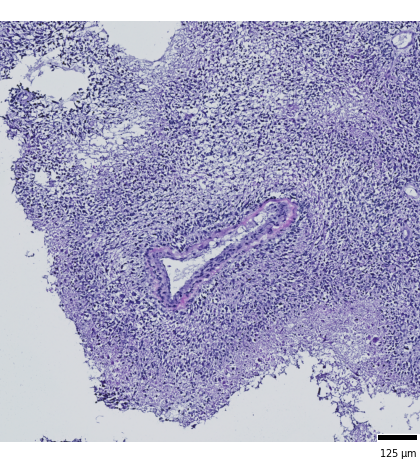

In [7]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim = (8150,9150)
ylim=(4000,5000)
sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['GW-like 5'],
    show_axis=False,
    palette= palette_GW,
    image=np.array(HE_SL035B),
    xlim=xlim,
    ylim=ylim,
    #flipy=False,
    #save = True,
    #savepath='figures/SL035B.svg',
    alpha=0,
    ax=ax
)

plt.savefig('figures/SL035B_HE_zoom.png',dpi=300, format='png',bbox_inches='tight')
plt.show()


In [8]:
import seaborn as sns
from matplotlib.colors import rgb2hex
sns.color_palette("PuRd", 12)
#GW1, GW2, GW3 = '#f4efef', '#f4efef', '#f4efef'

[(0.9312264513648597, 0.9124490580545944, 0.9530949634755863),
 (0.8892272202998847, 0.8472895040369088, 0.9188465974625144),
 (0.8424759707804691, 0.7488658208381391, 0.8671741637831603),
 (0.8120876585928489, 0.6606228373702422, 0.8215916955017301),
 (0.7946635909265667, 0.5666589773164169, 0.7736716647443291),
 (0.84879661668589, 0.45101114955786237, 0.7170780469050365),
 (0.8838600538254517, 0.3259515570934256, 0.6457823913879277),
 (0.9035447904652056, 0.17831603229527104, 0.5522798923490965),
 (0.8516724336793541, 0.11091118800461361, 0.42841983852364474),
 (0.7762860438292967, 0.0600692041522492, 0.3261514801999232),
 (0.6434140715109573, 0.015778546712802766, 0.2794002306805075),
 (0.5184621299500192, 0.0, 0.2057208765859285)]

In [5]:
palette_GW = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',
    
    'Endothelial':'#C8E683', # '#d5b8ff',  
    'Mural': '#C8E683',
    
    'nIPC-RG-like':'#7dfee3',
    'FB-like 3': '#9f5afd',#'#ff9470',
    
}

INFO:root:First filter, 160441 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 1901 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


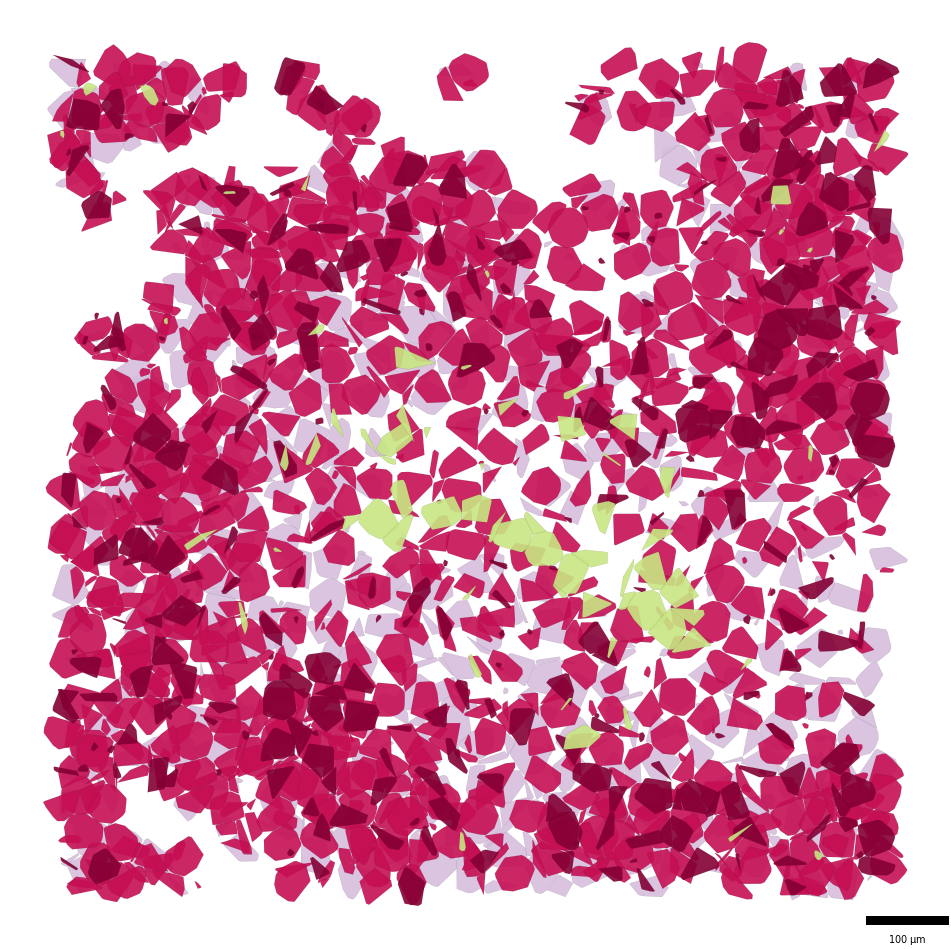

In [10]:
palette_colors = {
    'GW-like 2': '#60AFFF',
    'GW-like 3': '#93faa5',
    #'GW-like 1': '#87d37c',#'#8AFFC1',
    'GW-like 1': '#93faa5',#'#8AFFC1',
    'GW-like 5': '#1ba39c',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#a2d2ff', #blue
    #'GW-like 8': '#efcfe3',
    'GW-like 4': '#A40447',
    'GW-like 6': '#f62459',#'#840034',
    
    'Endothelial':'#fef160', # '#d5b8ff',  
    'Mural': '#d5b8ff',

    'nIPC-RG-like':'#7dfee3',
    'FB-like 3': '#9f5afd',#'#ff9470',
}

palette_GW = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',
    
    'Endothelial':'#C8E683', # '#d5b8ff',  
    'Mural': '#C8E683',
    
    'nIPC-RG-like':'#7dfee3',
    'FB-like 3': '#9f5afd',#'#ff9470',
    
}

fig,ax = plt.subplots(1,1 ,figsize=(10,10))
xlim = (11200, 12200)
ylim= (5500, 6500)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['GW-like 1','GW-like 8','GW-like 6','Endothelial'], 
    show_axis=False,
    palette= palette_GW,
    #image=np.array(HE_SL035B),
    xlim=xlim,
    ylim=ylim,
    #flipy=False,
    #save = True,
    #savepath='figures/SL035B.svg',
    alpha=0.9,
    ax=ax
)

plt.savefig('figures/SL035B_zoom.svg',dpi=300, format='png',bbox_inches='tight')
plt.show()

INFO:root:First filter, 160441 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 6583 cells left
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


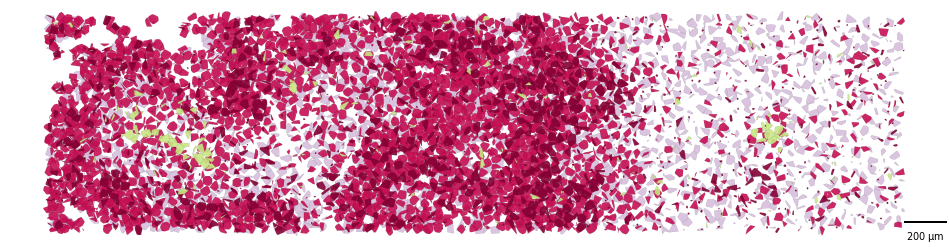

In [15]:
palette_GW = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',
    
    'Endothelial':'#C8E683', # '#d5b8ff',  
    'Mural': '#C8E683',
    
    'nIPC-RG-like':'#7dfee3',
    'FB-like 3': '#9f5afd',#'#ff9470',
    
}

fig,ax = plt.subplots(1,1 ,figsize=(10,10))
xlim = (11200, 15200)
ylim= (5500, 6500)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['GW-like 1','GW-like 8','GW-like 6','Endothelial'], 
    show_axis=False,
    palette= palette_GW,
    #image=np.array(HE_SL035B),
    xlim=xlim,
    ylim=ylim,
    #flipy=False,
    #save = True,
    #savepath='figures/SL035B.svg',
    alpha=0.9,
    ax=ax
)

plt.savefig('figures/SL035B_zoom2.svg',dpi=300, format='png',bbox_inches='tight')
plt.show()

In [3]:
from FISHscale.utils.dataset import Dataset
SL035B = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/AMEXP20220524_EEL_SL035B_S2/AMEXP20220524_EEL_SL035B_S2_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='0.27 micrometers',
             reparse=True,
            )

'''SL020color_dict['VEGFA'] = np.array((227, 61, 148)) / 255
SL020color_dict['FTL'] = np.array((255, 255, 204)) / 255
SL020color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255'''

INFO:root:Please install "BoneFight" or its missing dependencies. Error message: No module named 'bone_fight'
INFO:root:Could not import Cellpose. Ignore if cell segmentation is not needed. Error: No module named 'cellpose'
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be ch

2024-05-23 10:07:17,294 - INFO -     Loaded: AMEXP20220524_EEL_SL035B_S2_RNA_transformed_assigned


"SL020color_dict['VEGFA'] = np.array((227, 61, 148)) / 255\nSL020color_dict['FTL'] = np.array((255, 255, 204)) / 255\nSL020color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255"

In [6]:
import matplotlib.colors as mcolors
#SL020.color_dict['EGFR'] = mcolors.to_rgb(cluster_colors_GBM['preOPC-like 1'])
SL035B.color_dict['GFAP'] = mcolors.to_rgb('#93faa5')
SL035B.color_dict['COL1A1'] = mcolors.to_rgb('#89c4f4')
SL035B.color_dict['RGCC'] = mcolors.to_rgb('#f1e7fe')

SL035B.color_dict['FN1'] = mcolors.to_rgb('#d5b8ff')
SL035B.color_dict['TNC'] = mcolors.to_rgb('#e33d94')
SL035B.color_dict['VEGFA'] = mcolors.to_rgb(palette_GW['GW-like 6'])

<Axes: >

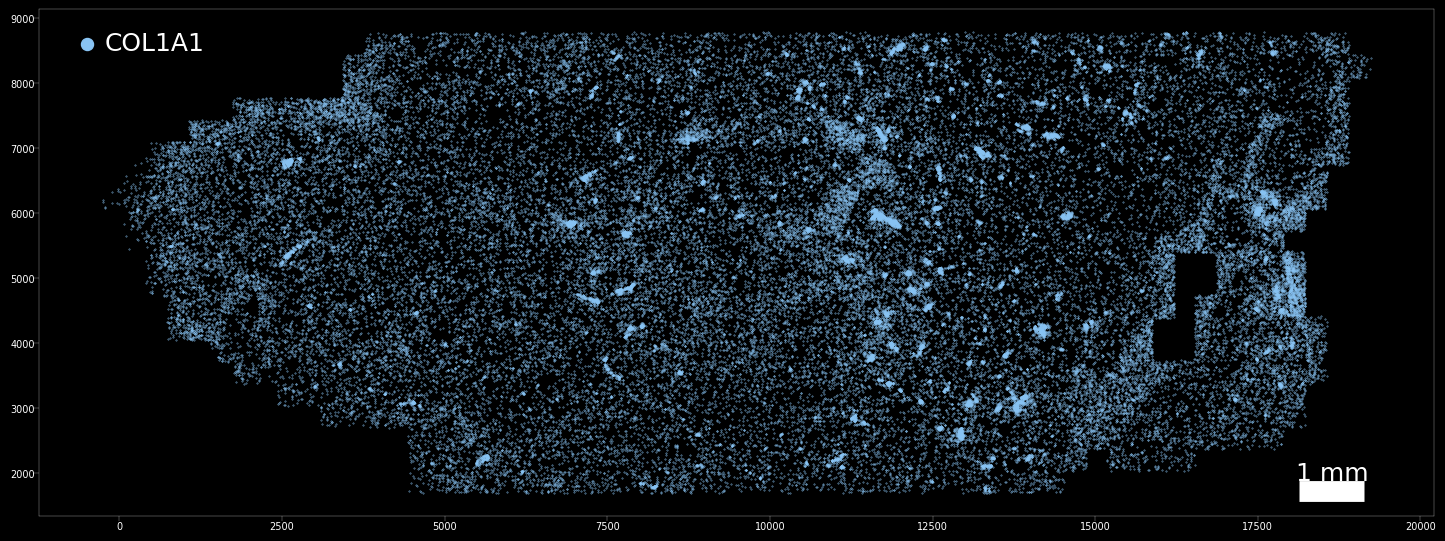

In [7]:
SL035B.scatter_plot(
    'COL1A1',
    ax_scale_factor=50,
    show_axes=True,
)

In [8]:
import zarr
from skimage import img_as_bool
from skimage.transform import rescale
from skimage import util
img = zarr.load('/datd/sl/fish_rawdata/AMEXP20220524_EEL_SL035B_S2/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
#img = np.flip(img, axis=0)
img[img >0] = 1
img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
#x1, y1, x2, y2 = x1*0.27, y1*0.27, x2*0.27, y2*0.27
img_SL035B = img_d

In [9]:
SL035B.color_dict['COL1A1'] = '#fffc7f'#palette_GW['FB-like 3']
SL035B.color_dict['RGCC'] = '#c5eff7'#'#89c4f4'
SL035B.color_dict['VEGFA'] = '#e76d89'#palette_GW['GW-like 7']
SL035B.color_dict['MGP'] = '#d5b8ff' #palette_GW['GW-like 5']
SL035B.color_dict['FN1'] = '#c3ff68' #palette_GW['Endothelial']
SL035B.color_dict['AQP4'] =  '#26c281'
SL035B.color_dict['PTPRZ1'] =  '#93faa5'
SL035B.color_dict['S100B'] =  '#c2f970'

<Axes: >

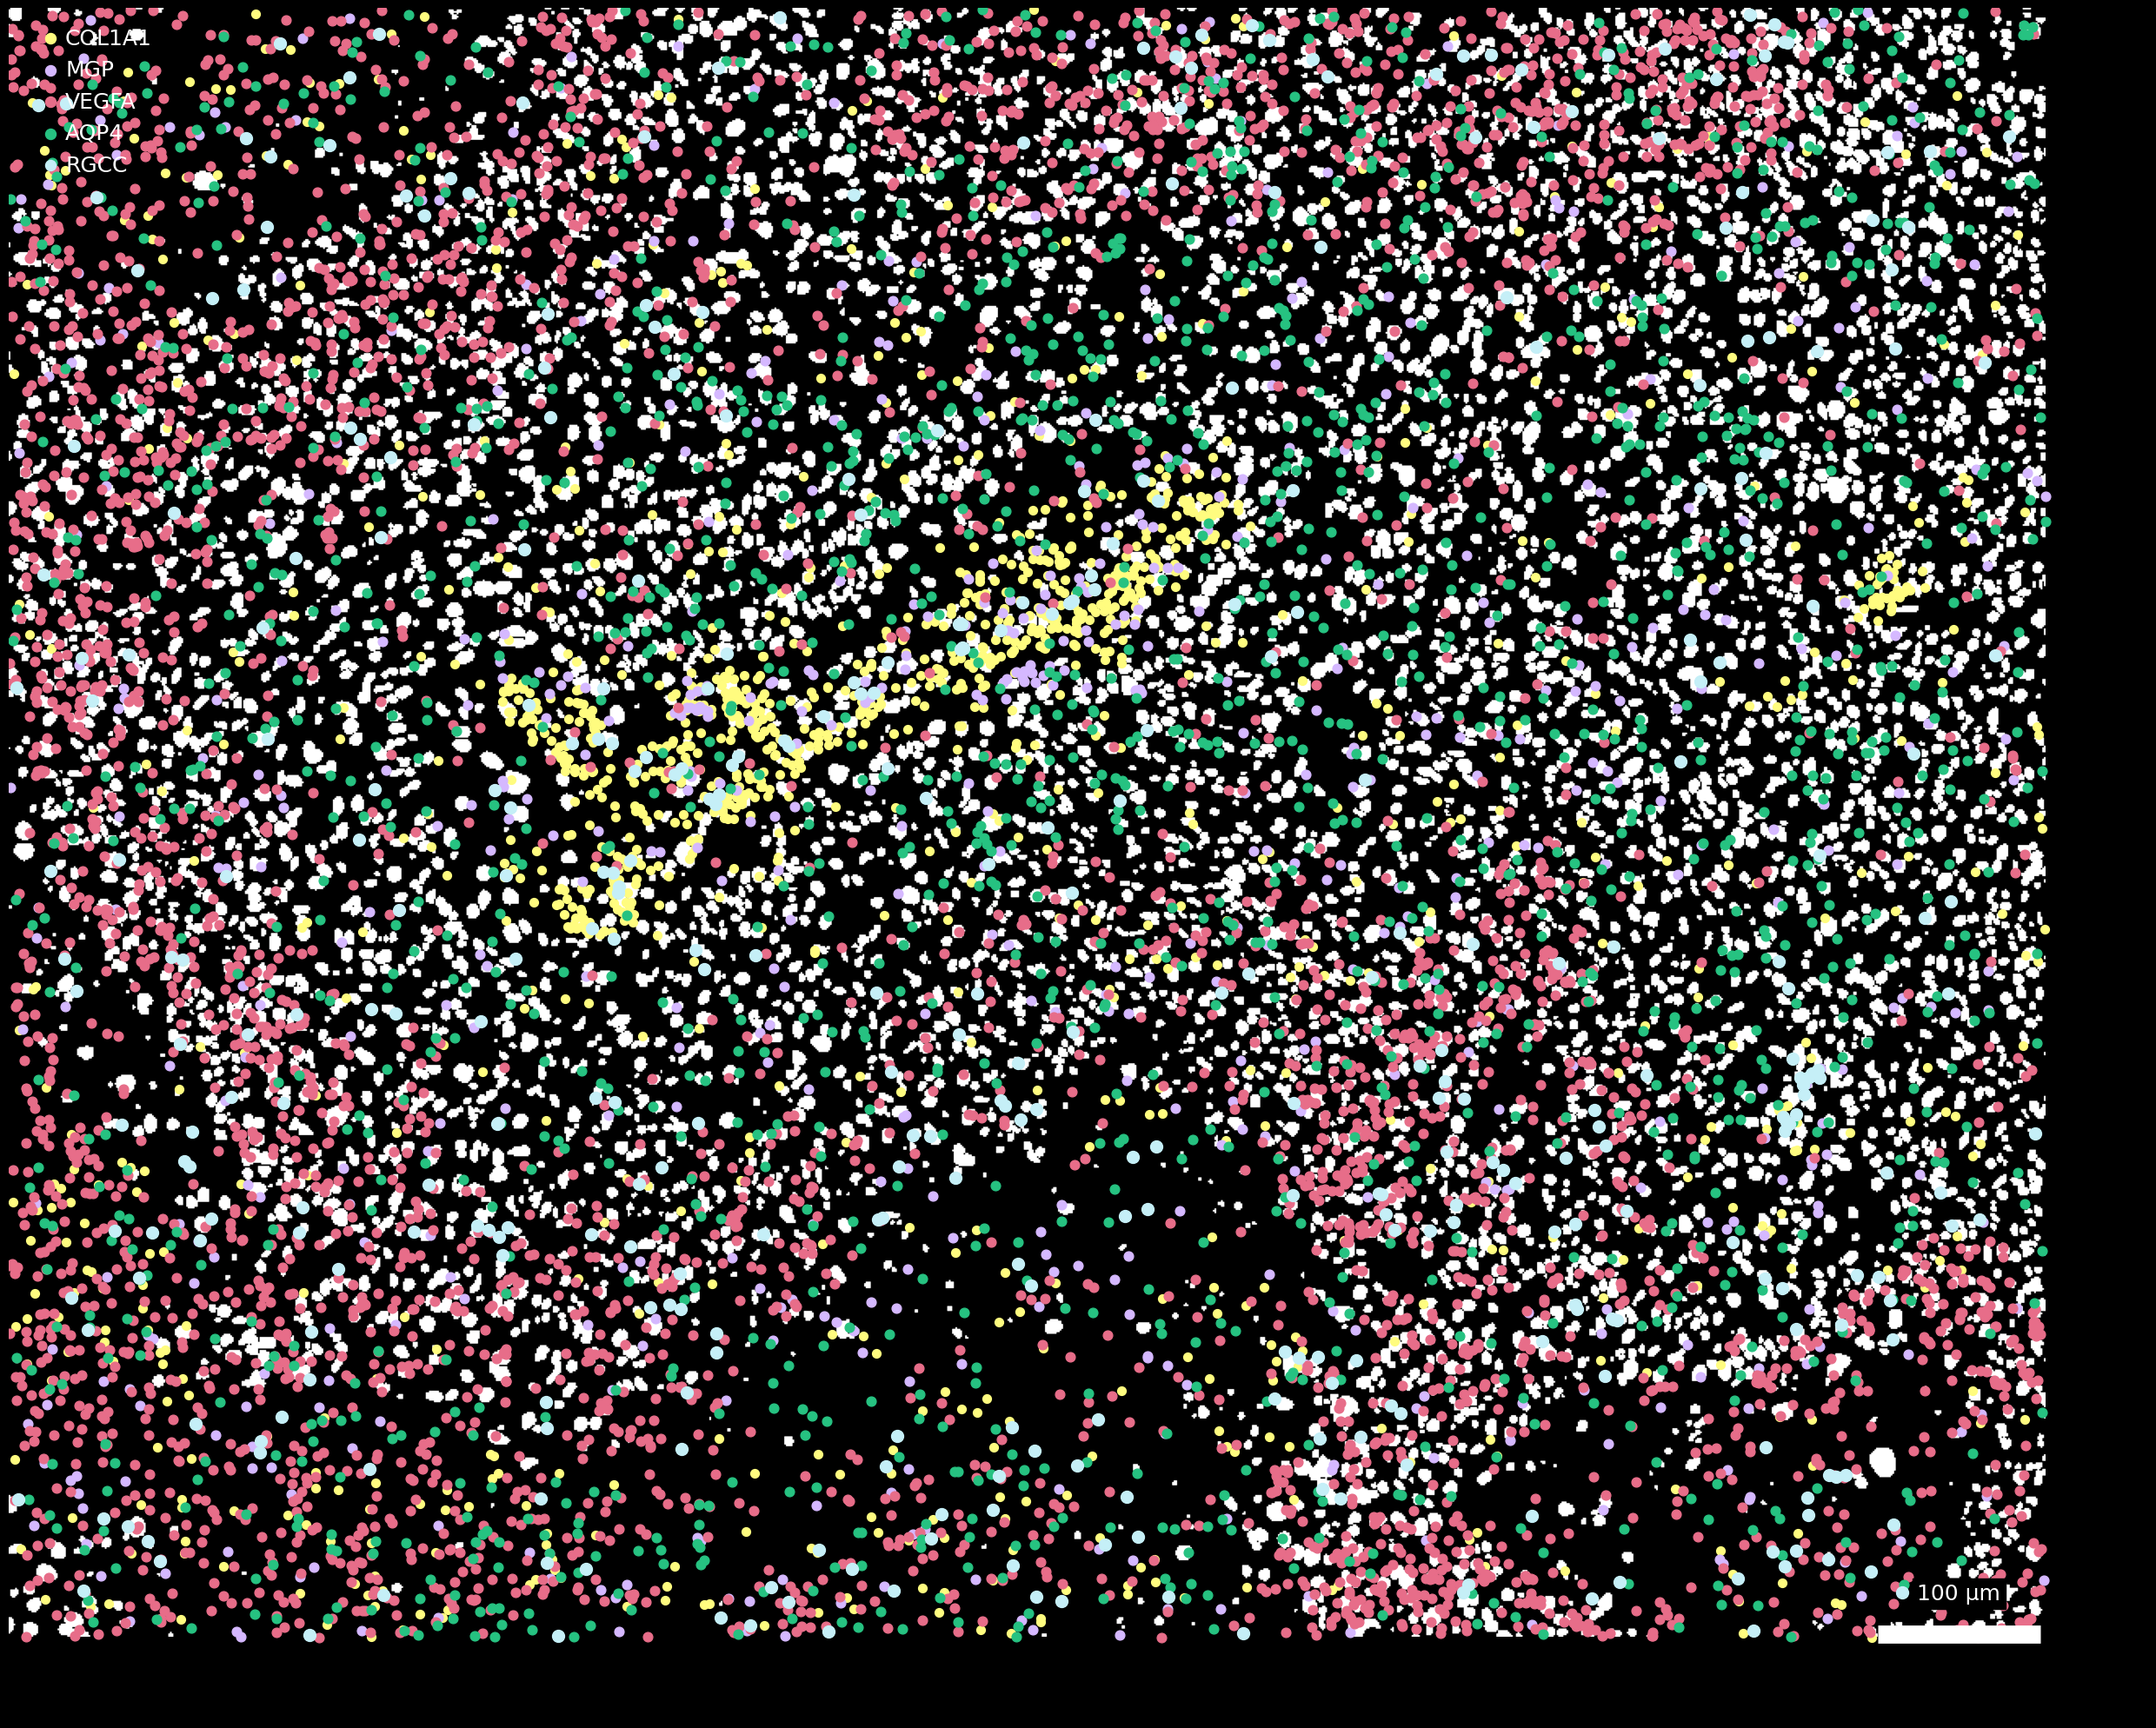

In [11]:
xlim= (11250,12500)
ylim= (5500,6500)
v =  [[xlim[0], ylim[0]],[xlim[1],ylim[1]]]

scale_factor = 1#0.27*4.5
img_zoom = img_SL035B[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [50, 60, 60, 60,100] 
genes = ['COL1A1', 'MGP','VEGFA','AQP4', 'RGCC']
SL035B.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=500,
    show_axes=False,
    show_legend=True,
    view = v,
    image=img_zoom,
    alpha_img=1,
    reset_xy=True,
    save=True,
    save_name='figures/SL035B_zoom_dots.svg'
)

In [ ]:
xlim= (11250,12500)
ylim= (5500,6500)
v =  [[xlim[0], ylim[0]],[xlim[1],ylim[1]]]

scale_factor = 1#0.27*4.5
img_zoom = img_SL035B[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [50, 60, 60, 60,60,60] 

genes = ['COL1A1', 'HES1','AQP4','S100B','TNC']
SL035B.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=500,
    show_axes=False,
    show_legend=True,
    view = v,
    image=img_zoom,
    alpha_img=.5,
    reset_xy=True,
    save=False,
    #save_name='figures/SL035B_zoom_dots.svg'
)

# SL020

In [ ]:
from PIL import Image
HE_SL020 = Image.open("/wsfish/glioblastoma/stainings/aligned_imgs/HE/HE_020_0_aligned_5d.tif")

In [ ]:
np.array(HE_SL020).shape

In [ ]:
fig,ax = plt.subplots(1,1 ,figsize=(10,10))

sp.pl.plot_polygons(
    adata,
    sample='SL020',
    cluster_key='m-states',
    clusters=['FB-like 3'],
    show_axis=True,
    palette= palette_GW,
    image=np.array(HE_SL020),
    #xlim=xlim,
    #ylim=ylim,
    #flipy=False,
    #save = True,
    #savepath='figures/SL035B.svg',
    alpha=0,
    ax=ax
)

plt.show()

In [ ]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim= (1500,2500)
ylim= (1500,2500)
sp.pl.plot_polygons(
    adata,
    sample='SL020',
    cluster_key='m-states',
    clusters=['FB-like 3'],
    show_axis=False,
    palette= palette_GW,
    image=np.array(HE_SL020),
    xlim=xlim,
    ylim=ylim,
    #flipy=False,
    #save = True,
    #savepath='figures/SL035B.svg',
    alpha=0,
    ax=ax
)
plt.savefig('figures/SL020_HE_zoom.png',dpi=300, format='png',bbox_inches='tight')
plt.show()


In [ ]:
palette_GW = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',
    
    'Endothelial':'#C8E683', # '#d5b8ff',  
    'Mural': '#C8E683',
    
    'nIPC-RG-like':'#7dfee3',
    'FB-like 3': '#9f5afd',#'#ff9470',
    
}

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
xlim= (1500,2500)
ylim= (1500,2500)
sp.pl.plot_polygons(
    adata,
    sample='SL020',
    cluster_key='m-states',
    clusters=['FB-like 3', 'GW-like 6', 'GW-like 8', 'GW-like 1','Endothelial'],
    show_axis=False,
    palette= palette_GW,
    image=np.array(HE_SL020),
    xlim=xlim,
    ylim=ylim,
    #flipy=False,
    #save = True,
    #savepath='figures/SL035B.svg',
    alpha_img=0,
    alpha=1,
    ax=ax
)
plt.savefig('figures/SL020_zoom.svg',dpi=300, format='png',bbox_inches='tight')
plt.show()


In [ ]:
from FISHscale.utils.dataset import Dataset
SL020 = Dataset('/wsfish/glioblastoma/EEL/Phase1/Analysis/AMEXP20220311_EEL_SL020_S2/AMEXP20220311_EEL_SL020_S2_RNA_transformed_assigned.parquet',
             gene_label='decoded_genes',
             pixel_size='0.27 micrometers',
             reparse=True,
            )

'''SL020color_dict['VEGFA'] = np.array((227, 61, 148)) / 255
SL020color_dict['FTL'] = np.array((255, 255, 204)) / 255
SL020color_dict['IGFBP5'] = np.array((210, 77, 87)) / 255'''


In [ ]:
SL020.scatter_plot(
    'COL1A1',
    ax_scale_factor=50,
    show_axes=True,
)

In [ ]:
import zarr
from skimage import img_as_bool
from skimage.transform import rescale
from skimage import util
img = zarr.load('/datc/sl/fish_rawdata/AMEXP20220311_EEL_SL020_S2/fresh_tissue/segmentation/image_segmented_labels.zarr/segmented_labels_image/')
#img = np.flip(img, axis=0)
img[img >0] = 1
img_d = rescale(img, 0.27, anti_aliasing=False)
img_d[img_d >0] = 1
img_d = img_as_bool(img_d)
#x1, y1, x2, y2 = x1*0.27, y1*0.27, x2*0.27, y2*0.27
img_SL020 = img_d

In [ ]:
SL020.color_dict['COL1A1'] = '#fffc7f'#palette_GW['FB-like 3']
SL020.color_dict['RGCC'] = '#c5eff7'#'#89c4f4'
SL020.color_dict['VEGFA'] = '#e76d89'#palette_GW['GW-like 7']
SL020.color_dict['MGP'] = '#d5b8ff' #palette_GW['GW-like 5']
SL020.color_dict['FN1'] = '#c3ff68' #palette_GW['Endothelial']
SL020.color_dict['AQP4'] =  '#26c281'
SL020.color_dict['PTPRZ1'] =  '#93faa5'
SL020.color_dict['S100B'] =  '#c2f970'

In [ ]:
xlim= (3250,3500)
ylim= (2500,3000)

v =  [[xlim[0], ylim[0]],[xlim[1],ylim[1]]]

scale_factor = 1#0.27*4.5
img_zoom = img_SL020[int(v[0][1]*scale_factor):int(v[1][1]*scale_factor),int(v[0][0]*scale_factor):int(v[1][0]*scale_factor)]

sizes = [10, 10, 10,10,30,10] 
genes = ['COL1A1', 'MGP','VEGFA','AQP4', 'RGCC']
SL020.scatter_plot(
    genes,
    s=sizes,
    ax_scale_factor=500,
    show_axes=False,
    show_legend=True,
    view = v,
    image=img_zoom,
    alpha_img=.5,
    reset_xy=True,
    save=True,
    save_name='figures/SL020_zoom_dots.svg'
)

In [ ]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['AC-like 3'],
    show_axis=False,
    palette= {'AC-like 3': '#E2D8EA'},
    alpha_img=0,
    alpha=1,
    ax=ax
)

In [ ]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['AC-like 5'],
    show_axis=False,
    palette= {'AC-like 5': '#E2D8EA'},
    alpha_img=0,
    alpha=1,
    ax=ax
)

In [ ]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['AC-like 6'],
    show_axis=False,
    palette= {'AC-like 6': '#E2D8EA'},
    alpha_img=0,
    alpha=1,
    ax=ax
)

In [ ]:
fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons(
    adata,
    sample='SL061B',
    cluster_key='m-states',
    clusters=['AC-like 6'],
    show_axis=False,
    palette= {'AC-like 6': '#E2D8EA'},
    alpha_img=0,
    alpha=1,
    ax=ax
)